In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Binarizer
import bayessets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [2]:
DATA_PATH = os.path.expanduser('~/Documents/datasets/mulan')
DATASETS = ['birds',
            'birds-test',
            'birds-train',
            'CAL500',
            'emotions',
            'emotions-test',
            'emotions-train',
            'mediamill',
            'mediamill-test',
            'mediamill-train',
            'yeast',
            'yeast-test',
            'yeast-train']

In [3]:
EXPANSION_SIZE = 20

In [4]:
precisions = {}
recalls = {}

for ds in DATASETS:
    df = pd.read_csv(os.path.join(DATA_PATH, ds + '_X.csv'))
    queries = pd.read_csv(os.path.join(DATA_PATH, ds + '_query.csv'))
    
    model = bayessets.BernoulliBayesianSet(df.as_matrix())
    precisions[ds] = []
    recalls[ds] = []
    
    for row in queries.iterrows():
        query = np.array([int(x) for x in row[1].query.split(',')])
        target = np.array([int(x) for x in row[1].target.split(',')])
        
        score = model.query(query)
        ordered = np.argsort(score)[::-1]
        expansion = set(ordered[~np.isin(ordered, query)][:EXPANSION_SIZE])
        
        valid_guesses = set(target)

        hits = len(expansion.intersection(valid_guesses))
        size = len(expansion)

        precision = hits / size
        recall = hits / len(target)
        precisions[ds].append(precision)
        recalls[ds].append(recall)
        
        
precisions = {key: np.mean(value) for key, value in precisions.items()}
recalls = {key: np.mean(value) for key, value in recalls.items()}

/home/diorge/.pyenv/versions/3.6.3/envs/jupyterexplore/lib/python3.6/site-packages/bayessets/bayessets.py:57: RuntimeWarning: invalid value encountered in log
  self.log_beta = np.log(self.beta)
/home/diorge/.pyenv/versions/3.6.3/envs/jupyterexplore/lib/python3.6/site-packages/bayessets/bayessets.py:100: RuntimeWarning: invalid value encountered in log
  log_beta_tilde = np.log(beta_tilde)
/home/diorge/.pyenv/versions/3.6.3/envs/jupyterexplore/lib/python3.6/site-packages/bayessets/bayessets.py:56: RuntimeWarning: invalid value encountered in log
  self.log_alpha = np.log(self.alpha)
/home/diorge/.pyenv/versions/3.6.3/envs/jupyterexplore/lib/python3.6/site-packages/bayessets/bayessets.py:99: RuntimeWarning: invalid value encountered in log
  log_alpha_tilde = np.log(alpha_tilde)


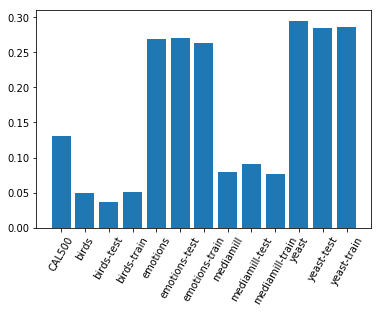

In [5]:
plt.bar(precisions.keys(), precisions.values())
plt.xticks(rotation=60);

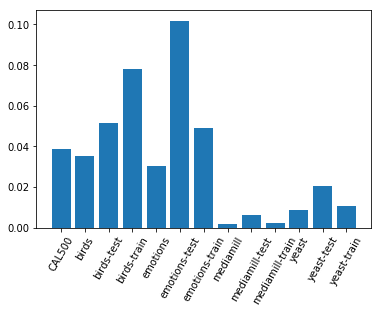

In [6]:
plt.bar(recalls.keys(), recalls.values())
plt.xticks(rotation=60);

In [7]:
precisionsbin = {}
recallsbin = {}

for ds in DATASETS:
    df = pd.read_csv(os.path.join(DATA_PATH, ds + '_X.csv'))
    queries = pd.read_csv(os.path.join(DATA_PATH, ds + '_query.csv'))
    
    scaler = MinMaxScaler()
    scaler.fit(df)
    binarizer = Binarizer(threshold=0.5)
    data = binarizer.fit_transform(scaler.transform(df))
    
    model = bayessets.BernoulliBayesianSet(data)
    precisionsbin[ds] = []
    recallsbin[ds] = []
    
    for row in queries.iterrows():
        query = np.array([int(x) for x in row[1].query.split(',')])
        target = np.array([int(x) for x in row[1].target.split(',')])
        
        score = model.query(query)
        ordered = np.argsort(score)[::-1]
        expansion = set(ordered[~np.isin(ordered, query)][:EXPANSION_SIZE])
        
        valid_guesses = set(target)

        hits = len(expansion.intersection(valid_guesses))
        size = len(expansion)

        precision = hits / size
        recall = hits / len(target)
        precisionsbin[ds].append(precision)
        recallsbin[ds].append(recall)
        
        
precisionsbin = {key: np.mean(value) for key, value in precisionsbin.items()}
recallsbin = {key: np.mean(value) for key, value in recallsbin.items()}

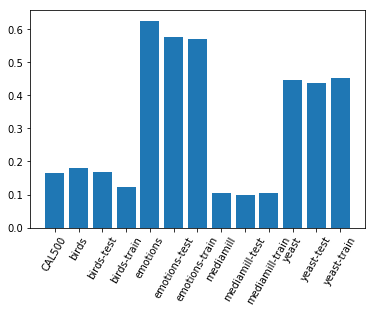

In [8]:
plt.bar(precisionsbin.keys(), precisionsbin.values())
plt.xticks(rotation=60);

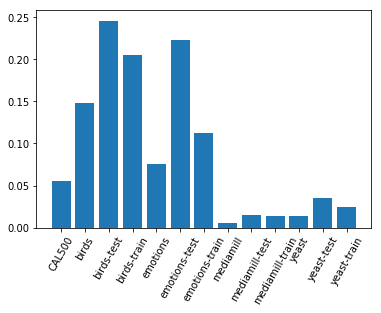

In [9]:
plt.bar(recallsbin.keys(), recallsbin.values())
plt.xticks(rotation=60);

In [10]:
resultslist = []
for ds in DATASETS:
    resultslist.append({'dataset': ds, 'type': 'continuous',
                        'precision': precisions[ds], 'recall': recalls[ds]})
    resultslist.append({'dataset': ds, 'type': 'binary',
                        'precision': precisionsbin[ds], 'recall': recallsbin[ds]})
    
results = pd.DataFrame(resultslist)
results

,dataset,precision,recall,type
0,birds,0.048925,0.035131,continuous
1,birds,0.179032,0.148206,binary
2,birds-test,0.037234,0.051617,continuous
3,birds-test,0.168085,0.245808,binary
4,birds-train,0.051506,0.078112,continuous
5,birds-train,0.122590,0.204737,binary
6,CAL500,0.130424,0.038834,continuous
7,CAL500,0.165750,0.055930,binary
8,emotions,0.269167,0.030415,continuous
9,emotions,0.625833,0.075909,binary


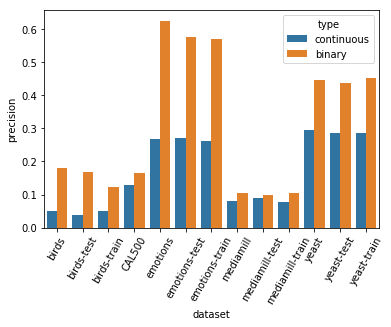

In [11]:
sns.barplot(x='dataset', y='precision', hue='type', data=results)
plt.xticks(rotation=60);

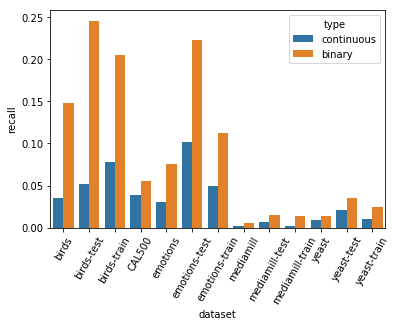

In [12]:
sns.barplot(x='dataset', y='recall', hue='type', data=results)
plt.xticks(rotation=60);

In [13]:
resultsbin = (results[results['type'] == 'binary']
              .assign(algorithm='Bernoulli Bayesian Sets')
              .drop('type', axis=1))
resultsbin

,dataset,precision,recall,algorithm
1,birds,0.179032,0.148206,Bernoulli Bayesian Sets
3,birds-test,0.168085,0.245808,Bernoulli Bayesian Sets
5,birds-train,0.122590,0.204737,Bernoulli Bayesian Sets
7,CAL500,0.165750,0.055930,Bernoulli Bayesian Sets
9,emotions,0.625833,0.075909,Bernoulli Bayesian Sets
11,emotions-test,0.575000,0.222548,Bernoulli Bayesian Sets
13,emotions-train,0.570000,0.112746,Bernoulli Bayesian Sets
15,mediamill,0.103317,0.005230,Bernoulli Bayesian Sets
17,mediamill-test,0.098932,0.015162,Bernoulli Bayesian Sets
19,mediamill-train,0.104150,0.013744,Bernoulli Bayesian Sets


In [14]:
with open(os.path.join(DATA_PATH, 'results'), 'a') as f:
    resultsbin.to_csv(f, header=False, index=False)